In [11]:
import warnings
warnings.filterwarnings("ignore")

In [12]:
import pandas as pd
from sklearn import tree
from IPython.display import Image
from six import StringIO
import pydot
import os

os.environ["PATH"] += os.pathsep + 'C:\\Program Files\\Graphviz\\bin'

In [13]:
df = pd.read_csv('../Data/PastHires.csv', header=0)
df.head()

,Years Experiencs,Employed,Previous employers,Level of Edudation,Top-tier School,Interned,Hired
0,10,Y,4,BS,N,N,Y
1,0,N,0,BS,Y,Y,Y
2,7,N,6,BS,N,N,N
3,2,Y,1,MS,Y,N,Y
4,20,N,2,PhD,Y,N,N


In [14]:
yes_no_map = {'Y': 1, 'N': 0}
edu_map = {'BS': 0, 'MS': 1, 'PhD': 2}

In [15]:
df['Employed'] = df['Employed'].map(yes_no_map)
df['Top-tier School'] = df['Top-tier School'].map(yes_no_map)
df['Interned'] = df['Interned'].map(yes_no_map)
df['Hired'] = df['Hired'].map(yes_no_map)
df['Level of Edudation'] = df['Level of Edudation'].map(edu_map)

df.head()

,Years Experiencs,Employed,Previous employers,Level of Edudation,Top-tier School,Interned,Hired
0,10,1,4,0,0,0,1
1,0,0,0,0,1,1,1
2,7,0,6,0,0,0,0
3,2,1,1,1,1,0,1
4,20,0,2,2,1,0,0


In [16]:
features = list(df.columns[:6])
print(features)

['Years Experiencs', 'Employed', 'Previous employers', 'Level of Edudation', 'Top-tier School', 'Interned']


In [17]:
x = df[features]
y = df['Hired']

In [18]:
clf = tree.DecisionTreeClassifier()
clf = clf.fit(x, y)
print(clf)

DecisionTreeClassifier()


In [22]:
dot_data = StringIO()
tree.export_graphviz(clf, feature_names=features, out_file=dot_data)
graph = pydot.graph_from_dot_data(dot_data.getvalue())
output_image = Image(graph[0].create_png())

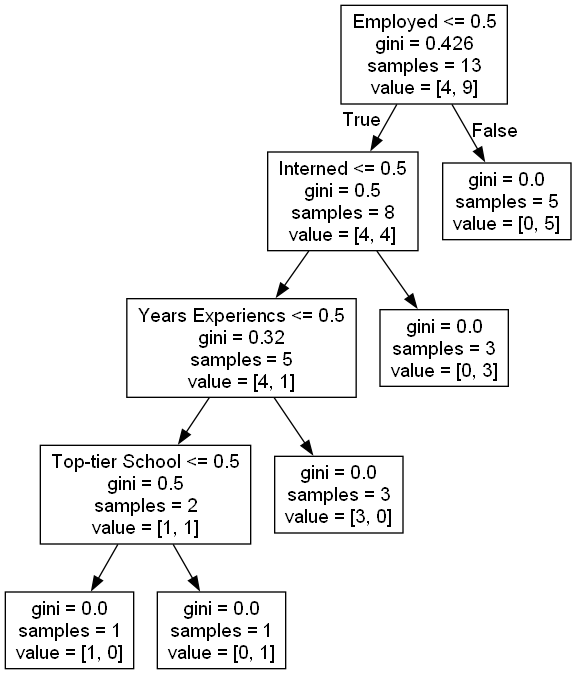

In [23]:
output_image